# Time Series

Anything that is observed/measured at many points in time forms a time series.

Many time series are of fixed frequency. (eg: every 15 sec, every 1 hr, etc.)

They can also be irregular, without having a fixed unit of time between each unit.

Time series data mainly exists of the following types;

> Timestamps - specific instants of time.

> Periods - a single fixed interval of time (eg: the month January, 2007)

> Intervals - indicated by a start and end timestamp.

> Experiment/Elapsed time - each time stamp is a measure of time relative to a particular starting time (eg: the size of the cookie baking each second since being palced in the oven).

Pandas provides many built-in tools and algorithms to manipulate time series data.

## Date and Time data types and tools

The standard python library contains 'datetime', 'time' and 'calendar' modules.

The datetime type is one that is widely used;

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2022, 9, 30, 19, 33, 9, 251823)

In [3]:
now.year, now.month, now.day

(2022, 9, 29)

Datetime stores both data and time down to the microsecond.

'timedelta' is an object that represents the temporal difference between 2 datetime objects.

In [8]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days, delta.seconds

(926, 56700)

We can add, subtract or multiply a timedelta object to shift datetime object;

In [3]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between String and Datetime
We can format datetime objects in timeseries and timestamp objects in pandas.

We can convert a timestamp to a string using str or strftime (formatted time convertion method);

In [11]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [12]:
stamp.strftime('%Y-%m-%d') 

'2011-01-03'

We can use the similar formatting from above to convert strings to dates using datetime.strptime (string parse time);

In [16]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%d/%m/%Y') for x in datestrs]

[datetime.datetime(2011, 6, 7, 0, 0), datetime.datetime(2011, 6, 8, 0, 0)]

strptime is a good way to parse a date with a known format. But it can be difficult to write a format each time. To solve this we can use dateutil.parser.parse;

In [5]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [6]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

For international time where the day appears before the month we can pass dayfirst=True;

In [7]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In pandas, the 'to_date' method can be used to parse many different kinds of date representations;

In [8]:
import pandas as pd
datestrs = ['2011-07-06 12:00:00', '2011-08-06 08:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 08:00:00'], dtype='datetime64[ns]', freq=None)

It also handles missing values. Nat - Not a Time is a pandas null value for timestamp data;

In [9]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 08:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [10]:
idx[2]

NaT

In [11]:
pd.isnull(idx)

array([False, False,  True])

'datetime' objects also have some specific formatting options that we can use as per our local time formats or requirements.

## Time series basics

The basic kind of time series object in pandas is basically a Series indexed by timestamps.

This is represented as Python 'strings' or 'datetime' objects external to pandas.

In [13]:
import numpy as np
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.572919
2011-01-05    2.170066
2011-01-07   -1.151224
2011-01-08    0.876510
2011-01-10   -0.090903
2011-01-12    0.022251
dtype: float64

Under the hood, these 'datetime' objects have been put in a 'DatetimeIndex' object;

In [15]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like any other Series, arithmetic operations between differently indexed time series automatically align on the dates;

In [16]:
ts + ts[::2]

2011-01-02   -1.145837
2011-01-05         NaN
2011-01-07   -2.302448
2011-01-08         NaN
2011-01-10   -0.181806
2011-01-12         NaN
dtype: float64

Pandas stores timestamps using Numpy's 'datetime64' datatype in nanosecond resolution;

In [17]:
ts.index.dtype

dtype('<M8[ns]')

Scalar values from a 'DatetimeIndex' are pandas 'Timestamp' objects;

In [19]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In conclusion, for pandas a 'Timestamp' object can be substituted anywhere we would use a 'datetime' object.

### Indexing, Selection, Subsetting

Time series behaves like any other pandas.Series where you are indexing and selecting data based on a lebel;

In [20]:
stamp = ts.index[2]
ts[stamp]

-1.1512238153123908

We can also pass a string that will be interpreted as a date;

In [21]:
ts['1/10/2011']

-0.09090281835917519

In [22]:
ts['20110110']

-0.09090281835917519

For a longer time series, only a year and month can be passed to easily select slices of data;

In [23]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.570112
2000-01-02    0.821075
2000-01-03   -1.044851
2000-01-04    0.107176
2000-01-05   -0.137355
                ...   
2002-09-22   -0.490467
2002-09-23    0.463822
2002-09-24   -0.448189
2002-09-25    2.271216
2002-09-26    0.987391
Freq: D, Length: 1000, dtype: float64

In [24]:
longer_ts['2001'] # slicing with year

2001-01-01    0.525111
2001-01-02   -2.058920
2001-01-03   -0.509295
2001-01-04    0.160580
2001-01-05   -0.075682
                ...   
2001-12-27    1.035449
2001-12-28    0.157344
2001-12-29   -0.079166
2001-12-30    1.119621
2001-12-31    0.544866
Freq: D, Length: 365, dtype: float64

In [25]:
longer_ts['2001-05'] # slicing with year and month

2001-05-01   -0.308292
2001-05-02   -1.089592
2001-05-03    0.758852
2001-05-04    1.003154
2001-05-05    2.207004
2001-05-06    0.687528
2001-05-07   -0.697254
2001-05-08    1.738610
2001-05-09   -0.562399
2001-05-10   -2.414949
2001-05-11   -0.811928
2001-05-12   -0.145140
2001-05-13    0.195906
2001-05-14    0.366436
2001-05-15    0.604073
2001-05-16    0.466092
2001-05-17    0.907865
2001-05-18    0.267544
2001-05-19   -2.387417
2001-05-20   -0.743256
2001-05-21    2.775229
2001-05-22   -0.880143
2001-05-23    0.956812
2001-05-24    0.166430
2001-05-25   -0.605185
2001-05-26   -0.429513
2001-05-27    0.826244
2001-05-28   -1.149769
2001-05-29   -0.752842
2001-05-30    0.693708
2001-05-31   -0.334432
Freq: D, dtype: float64

In [26]:
ts[datetime(2011, 1, 7):] # slicing with datetime object

2011-01-07   -1.151224
2011-01-08    0.876510
2011-01-10   -0.090903
2011-01-12    0.022251
dtype: float64

Since most time series data is ordered chronologically, you can slice with timestamps that are present in the time series to perform a range like query;

In [27]:
ts

2011-01-02   -0.572919
2011-01-05    2.170066
2011-01-07   -1.151224
2011-01-08    0.876510
2011-01-10   -0.090903
2011-01-12    0.022251
dtype: float64

In [28]:
ts['1/6/2011' : '1/11/2011']

2011-01-07   -1.151224
2011-01-08    0.876510
2011-01-10   -0.090903
dtype: float64

As before, we can pass either a string date, 'datetime' or a pd.Timestamp.

There is an equivalent method to slice a Series between 2 dates called 'Truncate';

In [31]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.572919
2011-01-05    2.170066
2011-01-07   -1.151224
2011-01-08    0.876510
dtype: float64

All of the above holds true for DataFrames as well;

In [34]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [35]:
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates,
                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.000369,-1.247161,1.778649,-0.018983
2000-01-12,0.457700,-1.295501,0.642533,2.792595
2000-01-19,-0.285074,-0.532179,-0.689406,-0.572022
2000-01-26,0.785800,0.872043,-1.255189,-0.530965
2000-02-02,0.766489,1.599521,-0.911576,0.556493


In [36]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.872604,0.238751,-0.372476,-0.242318
2001-05-09,0.434003,-0.069693,0.056493,0.432164
2001-05-16,0.535296,0.926945,-0.591140,-2.064325
2001-05-23,0.024452,1.731774,-1.663885,0.307730
2001-05-30,0.393423,-0.190993,0.611352,1.930100


### Time Series with duplicate indices

In some appliacations, there may be multiple data observations falling on a particular timestamp;

In [48]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', 
                     '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [49]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

We can tell that the index is not unique by checking 'is_unique';

In [43]:
dup_ts.index.is_unique

False

Indexing on this Series can either produce scalar values or duplicated values depending on the indexed timestamp;

In [50]:
dup_ts['1/3/2000'] # not duplicated

4

In [51]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

Suppose we want to aggregate the data having non-unique timestamps, we can do this using groupby and pass level=0;

In [52]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [53]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies and Shifting

Generic time series in pandas are assumend to be irregular, i.e: they have no fixed frequncy.

But it is often desirable to work relative to a fixed frequency such as daily, monthly, every 15 mins, etc even if it means including some missing values into a time series.

Pandas has time series frequencies and tools for this case.

We can convert a sample time series to be fixed daily frequency by calling 'resample';

In [54]:
ts

2011-01-02   -0.572919
2011-01-05    2.170066
2011-01-07   -1.151224
2011-01-08    0.876510
2011-01-10   -0.090903
2011-01-12    0.022251
dtype: float64

In [55]:
resampler = ts.resample('D')  # D - daily
resampler

As we can see the object returned is 'DatetimeIndexResampler'.

### Generating date ranges

pandas.date_range generates a 'DatetimeIndex' with an indicated length according to a particular frequency (daily freq by default); 

In [56]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

If we pass only a start or an end date, then we must pass the number of periods to generate;

In [57]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

We can also pass differnt frequencies like, 'BM' - business end of month (contains the last business day for each month);

In [59]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

By default, date_range preserves the time of the start and the end stamp;

In [60]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes we have time info in the start and end dates but we may want to normalize to midnight as a convention;

In [61]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date offsets

Frequencies in pandas are composed of a base frequncy like hourly-'H' or monthly-'M' and a multiplier which is the date offset;

In [62]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

We can define a multiple of an offset by passing an integer;

In [63]:
four_hours = Hour(4)
four_hours

<4 * Hours>

We won't be needing to expicitly create one of these objects, instead we use a string alias like '4H';

In [65]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Many offsets can be combined together by addition;

In [66]:
Hour(2) + Minute(30)

<150 * Minutes>

We can also pass frequency strings as given below;

In [67]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Some frequencies describe points in time that are not evenly spaced like 'BM' which depends on whether the month ends in a weekend or not. These are referred to as anchored offsets.

#### Week of month dates
WOM - enables us to get dates like the third Friday of each month.

In [68]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (leading and lagging) data
We can shift forwards and backwards in a Series or a DataFrame without modifying the index;

In [69]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', 
                                                       periods=4, 
                                                       freq='M'))
ts

2000-01-31   -0.249563
2000-02-29   -0.624552
2000-03-31   -2.721904
2000-04-30   -0.526986
Freq: M, dtype: float64

In [70]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.249563
2000-04-30   -0.624552
Freq: M, dtype: float64

In [71]:
ts.shift(-2)

2000-01-31   -2.721904
2000-02-29   -0.526986
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

A common use of shift is computing the percent changes in a time series. It can be expressed as;

In [72]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.502586
2000-03-31    3.358172
2000-04-30   -0.806391
Freq: M, dtype: float64

As we can see naive shift discards some data, so we can shift it to advance the timestamps instead of just the data;

In [73]:
ts.shift(2, freq='M')

2000-03-31   -0.249563
2000-04-30   -0.624552
2000-05-31   -2.721904
2000-06-30   -0.526986
Freq: M, dtype: float64

We can pass other frequencies as well;

In [74]:
ts.shift(3, freq='D')

2000-02-03   -0.249563
2000-03-03   -0.624552
2000-04-03   -2.721904
2000-05-03   -0.526986
dtype: float64

In [75]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.249563
2000-02-29 01:30:00   -0.624552
2000-03-31 01:30:00   -2.721904
2000-04-30 01:30:00   -0.526986
dtype: float64

#### Shifting data with offsets

We can use offsets with 'datetime' and 'Timestamp' objects as well;

In [76]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

If we use an anchored offset like MonthEnd, it will roll forward to the next date according to the frequency;

In [77]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [78]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Anchored offsets can roll dates forward or backward using their 'rollforward' and 'rollback' methods;

In [79]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [80]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

A useful way of using this is with groupby;

In [81]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    1.317710
2000-01-19   -0.457001
2000-01-23   -0.203509
2000-01-27    0.632818
2000-01-31    1.277243
2000-02-04    1.418249
2000-02-08   -0.793585
2000-02-12   -0.079054
2000-02-16   -0.917601
2000-02-20   -0.113054
2000-02-24    0.354441
2000-02-28   -1.454293
2000-03-03   -0.992363
2000-03-07    0.591924
2000-03-11    0.720922
2000-03-15    0.444269
2000-03-19    0.357418
2000-03-23    1.353763
2000-03-27   -1.027356
2000-03-31    1.105836
Freq: 4D, dtype: float64

In [82]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.513452
2000-02-29   -0.226414
2000-03-31    0.319302
dtype: float64

The more effective way of doing this however is by resampling as we learnty before;

In [83]:
ts.resample('M').mean()

2000-01-31    0.513452
2000-02-29   -0.226414
2000-03-31    0.319302
Freq: M, dtype: float64

## Time Zone handling

Most time series users choose to work with time series in a coordinated universal time (UTC).

All other time zones are expressed as offsets of UTC.

In Python, time zone info comes from 'pytz' library which uses the Olsen database which contains world time zone info;

In [1]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

To get a timezone object from pytz, we use pytz.timezone;

In [2]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

Methods in pandas will either accept the time zone names as strings or like the above object.

### Time zone Localization and Conversion

By default, time seires in Pandas do not have a time zone associated with them (time zone naive);

In [3]:
import pandas as pd
import numpy as np

In [4]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.824044
2012-03-10 09:30:00    1.365843
2012-03-11 09:30:00    0.363004
2012-03-12 09:30:00    0.131379
2012-03-13 09:30:00    0.317891
2012-03-14 09:30:00   -1.302140
Freq: D, dtype: float64

In [5]:
print(ts.index.tz)

None


As we can see from the above, the index's tz field is None.

Date ranges can be generated with a time zone set;

In [6]:
pd.date_range('3/9/2012', periods=6, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 00:00:00+00:00', '2012-03-10 00:00:00+00:00',
               '2012-03-11 00:00:00+00:00', '2012-03-12 00:00:00+00:00',
               '2012-03-13 00:00:00+00:00', '2012-03-14 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

We can also covert a naive time series to a one with a time zone (localized) using 'tz_localize' method;

In [7]:
ts

2012-03-09 09:30:00   -0.824044
2012-03-10 09:30:00    1.365843
2012-03-11 09:30:00    0.363004
2012-03-12 09:30:00    0.131379
2012-03-13 09:30:00    0.317891
2012-03-14 09:30:00   -1.302140
Freq: D, dtype: float64

In [9]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.824044
2012-03-10 09:30:00+00:00    1.365843
2012-03-11 09:30:00+00:00    0.363004
2012-03-12 09:30:00+00:00    0.131379
2012-03-13 09:30:00+00:00    0.317891
2012-03-14 09:30:00+00:00   -1.302140
Freq: D, dtype: float64

In [10]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

A time series can be converted from one time zone to another with the 'tz_convert' method;

In [11]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.824044
2012-03-10 04:30:00-05:00    1.365843
2012-03-11 05:30:00-04:00    0.363004
2012-03-12 05:30:00-04:00    0.131379
2012-03-13 05:30:00-04:00    0.317891
2012-03-14 05:30:00-04:00   -1.302140
Freq: D, dtype: float64

From a New York time zone, we can localize it to EST then we can convert it to UTC or Berlin time;

In [12]:
ts_east = ts.tz_localize('America/New_York')
ts_east.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.824044
2012-03-10 14:30:00+00:00    1.365843
2012-03-11 13:30:00+00:00    0.363004
2012-03-12 13:30:00+00:00    0.131379
2012-03-13 13:30:00+00:00    0.317891
2012-03-14 13:30:00+00:00   -1.302140
dtype: float64

In [13]:
ts_east.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.824044
2012-03-10 15:30:00+01:00    1.365843
2012-03-11 14:30:00+01:00    0.363004
2012-03-12 14:30:00+01:00    0.131379
2012-03-13 14:30:00+01:00    0.317891
2012-03-14 14:30:00+01:00   -1.302140
dtype: float64

'tz_localize' and 'tz_convert' are also methods of DatetimeIndex;

In [18]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with time zone - Aware Timestamp objects

Similar to time series and date ranges, induvidula timestamp objects can also be localized from naive to time zone-aware;

In [21]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

We can also pass a time zone when creating a timestamp;

In [22]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Timezone aware timestamps internally store the a UTC timestamp value as nanoseconds since the Unix eoch (Jan 1, 1970) whose value does not change between timzone conversions;

In [23]:
stamp_utc.value

1299902400000000000

In [24]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

Pandas respects daylight saving time (DST) transitions (shifting time forward or backward) where possible.

30 minutes before transitioning to DST;

In [26]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [27]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

90 minutes before transitioning out of DST;

In [28]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [30]:
stamp + 1.5 * Hour()

Timestamp('2012-11-04 01:00:00-0500', tz='US/Eastern')

### Operations between different time zones

If 2 time series of different time zones are combined then the result will be a UTC;

In [31]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.708876
2012-03-08 09:30:00    0.764895
2012-03-09 09:30:00    2.703133
2012-03-12 09:30:00   -0.199357
2012-03-13 09:30:00    0.943681
2012-03-14 09:30:00   -0.972070
2012-03-15 09:30:00    0.435652
2012-03-16 09:30:00   -0.871545
2012-03-19 09:30:00   -0.445826
2012-03-20 09:30:00   -0.114310
Freq: B, dtype: float64

In [32]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and Period Arithmetic

Periods represents timespans like days, months, qaurters or years. The 'Period' object represents this datatype;

In [33]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In the above case, the Period object represents the full timespan from Jan 1, 2007 to Dec 31, 2007.

Adding or Subtracting integers from periods causes shiting wrt the frequency;

In [34]:
p + 5

Period('2012', 'A-DEC')

In [35]:
p - 2

Period('2005', 'A-DEC')

If two periods have the same frequency, then the differnce is the amount of units between them;

In [36]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

Regular range of periods can be constructed using 'period_range';

In [37]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

As we can see the 'PeriodIndex' object stores a sequence of periods that can be passed as an index any pandas data structure;

In [38]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.604468
2000-02    0.014403
2000-03   -0.674339
2000-04    0.944798
2000-05   -2.734440
2000-06    0.559397
Freq: M, dtype: float64

We can also pass an array of string to a 'PeriodIndex' object;

In [40]:
values = ['2001Q1', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC') # in quarters
index

PeriodIndex(['2001Q1', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period frequency conversion

'Period' and 'PeriodIndex' objects can be converted to another frequency with the 'asfreq' method;

For example, we want to convert annual period to a monthly period;

In [41]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [42]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [43]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

We can think of a Period ('2007', 'A-DEC') as a sort of cursor pointing to a span of time, subdivided by monthly periods;
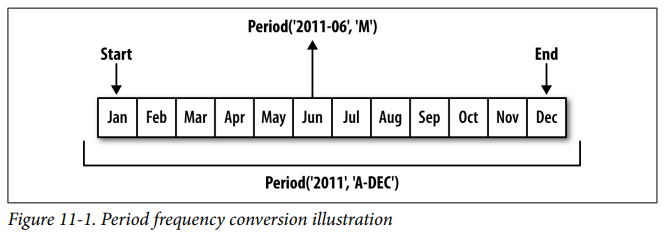

We can also create for a year not ending in December (fiscal year - year containing 12 consecutive months ending on the last day of any month other than December);

In [44]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [45]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [46]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

When covering from high to low frequency pandas determines the superperiod depending on where the superperiod belongs. Eg: in a A-JUN frequency, the month Aug-2007 is actually a part of the 2008 period;

In [47]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Whole PeriodIndex objects can be converted using the same logic;

In [48]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.945601
2007   -0.301744
2008    1.425630
2009   -0.827797
Freq: A-DEC, dtype: float64

In [49]:
ts.asfreq('M', how='start')

2006-01    1.945601
2007-01   -0.301744
2008-01    1.425630
2009-01   -0.827797
Freq: M, dtype: float64

In [50]:
ts.asfreq('B', how='end')

2006-12-29    1.945601
2007-12-31   -0.301744
2008-12-31    1.425630
2009-12-31   -0.827797
Freq: B, dtype: float64

### Quarterly period frequencies

Quarterly data is standar in accounting, finance and other fields.

Qarterly data is often reported wrt a fiscal year.

Pandas supports all 12 possible quarterly frequencies as Q-JAN throught Q-DEC.

In [51]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In case of a fiscal year ending in January, 2012Q4 runs from November through January similary others are;
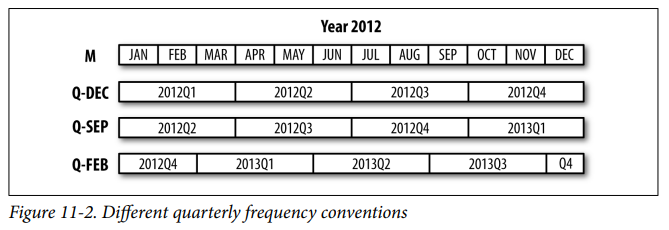

In [52]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [53]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

It's possible to do easy period arithmetic, for example to get the timestamp at 4PM on the second to least buisiness day of the quarter;

In [54]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [55]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

We can generate quarterly ranges using 'period_range';

In [56]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

The arithmetic for the period_range is also the similar;

In [59]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods and back

Series and DataFrame objects indexed by timestamps can be converted into periods with the 'to_period' method;

In [60]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-31   -0.149179
2000-02-29   -0.509014
2000-03-31    0.394112
Freq: M, dtype: float64

In [61]:
pts = ts.to_period()
pts

2000-01   -0.149179
2000-02   -0.509014
2000-03    0.394112
Freq: M, dtype: float64

A timestamp can only belong to a single period for a given frequency. But there is no issues in having duplicate periods in the result;

In [62]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -1.235988
2000-01-30    0.701285
2000-01-31   -0.829758
2000-02-01    0.103972
2000-02-02    1.342535
2000-02-03   -0.410824
Freq: D, dtype: float64

In [64]:
ts2.to_period('M')

2000-01   -1.235988
2000-01    0.701285
2000-01   -0.829758
2000-02    0.103972
2000-02    1.342535
2000-02   -0.410824
Freq: M, dtype: float64

To convert back to timestamp use 'to_timestamp';

In [65]:
pts = ts2.to_period()
pts

2000-01-29   -1.235988
2000-01-30    0.701285
2000-01-31   -0.829758
2000-02-01    0.103972
2000-02-02    1.342535
2000-02-03   -0.410824
Freq: D, dtype: float64

In [66]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -1.235988
2000-01-30 23:59:59.999999999    0.701285
2000-01-31 23:59:59.999999999   -0.829758
2000-02-01 23:59:59.999999999    0.103972
2000-02-02 23:59:59.999999999    1.342535
2000-02-03 23:59:59.999999999   -0.410824
Freq: D, dtype: float64

### Creating a PeriodIndex from arrays

Fixed frequncy datesets are sometimes stored with timespan information spread across multiple columns like in the dataset given below;

In [67]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [68]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [70]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

By passing these arrays to 'PeriodIndex' with a frequency, we can combine them to form an index for the DataFrame;

In [71]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [73]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency conversion

Resampling is the process of converting a time series from one frequency to another.

Aggregating higher frequency data to lower frequency is called downsampling, while vice versa is called upsampling.

Not all resampling is of the above 2 categories. Eg: converting W-WED to W-FRI is neither of the two.

For this pandas has the 'resample' method.

In [1]:
import pandas as pd
import numpy as np

In [2]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.120379
2000-01-02    0.664164
2000-01-03   -0.308346
2000-01-04   -0.007846
2000-01-05   -0.669719
                ...   
2000-04-05    0.349450
2000-04-06    0.205449
2000-04-07    0.777220
2000-04-08   -0.278765
2000-04-09   -0.901228
Freq: D, Length: 100, dtype: float64

In [3]:
ts.resample('M').mean() # M - month end

2000-01-31   -0.387215
2000-02-29    0.026634
2000-03-31    0.050696
2000-04-30    0.092624
Freq: M, dtype: float64

### Downsampling

Aggregating data to a lower frequency.

The desired frequency to convert to defines bin edges that are used to slice the time series into pieces to aggregate.

Eg: to convert from 'M' to 'BM' we need to chop up the data into one month intervals.

Each interval is half-open and the intervals are aggregated together.

Things to consider when using resample to downsample data,
* Which side the interval is on.
* How to label each bin, either with the start or the end of the interval.

For example, consider a timeseries consisting of some one-minute data;

In [4]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

Suppose we want to aggregate this data into 5-minute chunks by taking the sum of each group;

In [5]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [6]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

We can also provide labels based on the bin edge - 'left' or 'right';

In [7]:
ts.resample('5min', closed='right', label='left').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

An illustration of this is;
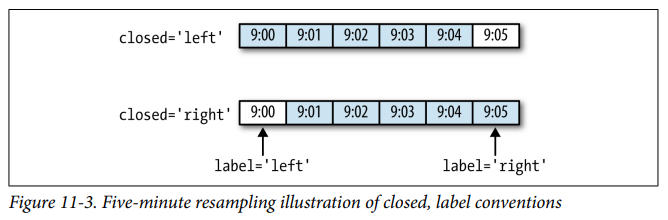

We might want to shift the result index by some amount, we can use 'loffset=';

In [8]:
ts.resample('5min', closed='right', label='left', loffset='-1s').sum()

C:\Users\Visakan\AppData\Local\Temp\ipykernel_12504\2183295028.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='left', loffset='-1s').sum()


1999-12-31 23:54:59     0
1999-12-31 23:59:59    15
2000-01-01 00:04:59    40
2000-01-01 00:09:59    11
Freq: 5T, dtype: int32

OHLC - In finance, it is a popular way to aggregate a time series by computing 4 values for each bucket - first(open), last(close), maximum(high) and minimal(low) values;

In [9]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

When converting from low frequency to a higher frequency, no aggregation is needed;

In [10]:
frame = pd.DataFrame(np.random.randn(2, 4), 
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-12,0.253742,-0.084337,-0.686927,-0.182261


We use asfreq method here to convert to higher frequency data without any aggregation;

In [11]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.253742,-0.084337,-0.686927,-0.182261


Suppose we want to fill forward each weekly value on the non-Wednesday then 'fillna' method for filling and the 'reindex' method for interpolation;

In [12]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-06,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-07,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-08,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-09,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-10,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-11,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-12,0.253742,-0.084337,-0.686927,-0.182261


In [14]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-06,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-07,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-08,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-09,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-10,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-11,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-12,0.253742,-0.084337,-0.686927,-0.182261


We can also limit the fill to only a certain number of periods;

In [15]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-06,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-07,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.253742,-0.084337,-0.686927,-0.182261


In [16]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.680978,-1.106859,-1.043297,-0.016343
2000-01-13,0.253742,-0.084337,-0.686927,-0.182261


### Resampling with periods

It is similar to timestamps resampling;

In [19]:
frame = pd.DataFrame(np.random.randn(23, 4), 
                     index=pd.date_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-31,0.991328,-1.691841,-0.902161,-0.511062
2000-02-29,0.347321,-1.240429,0.309667,-0.280622
2000-03-31,-0.642007,-1.364596,-0.847515,-1.122186
2000-04-30,-0.378461,-2.995228,-0.508513,-2.252377
2000-05-31,-0.317991,-0.476234,-1.376285,-1.152544


In [20]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000-12-31,0.062823,-0.638964,-0.032293,-0.573094
2001-12-31,0.011133,0.516669,0.029981,-0.341042


In upsampling, which must make a decision about which end of the timespan in the new frequncy to place the values;

In [21]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,0.062823,-0.638964,-0.032293,-0.573094
2001-03-31,0.062823,-0.638964,-0.032293,-0.573094
2001-06-30,0.062823,-0.638964,-0.032293,-0.573094
2001-09-30,0.062823,-0.638964,-0.032293,-0.573094
2001-12-31,0.011133,0.516669,0.029981,-0.341042


In [22]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,0.062823,-0.638964,-0.032293,-0.573094
2001-03-31,0.062823,-0.638964,-0.032293,-0.573094
2001-06-30,0.062823,-0.638964,-0.032293,-0.573094
2001-09-30,0.062823,-0.638964,-0.032293,-0.573094
2001-12-31,0.011133,0.516669,0.029981,-0.341042


Since periods refer to timespans, the rules about upsampling and downsampling are more rigid:
* In downsampling, the target frequency must be a subperiod of the source
frequency.
* In upsampling, the target frequency must be a superperiod of the source
frequency.

In [23]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,0.062823,-0.638964,-0.032293,-0.573094
2001-03-31,0.062823,-0.638964,-0.032293,-0.573094
2001-06-30,0.062823,-0.638964,-0.032293,-0.573094
2001-09-30,0.062823,-0.638964,-0.032293,-0.573094
2001-12-31,0.011133,0.516669,0.029981,-0.341042


## Moving Window Functions

An important array transformation used for time series operations are functions evaluated over a sliding window or with exponentially decaying weights.

This can be useful for smoothing noisy or gappy data.

First, loading a time series data to a business day frequency.

In [24]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True,
                           index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

Now introducing the rolling operator which behaves similarly to resample and groupby. It can be called on a pandas data structure along with a window;

<AxesSubplot:>

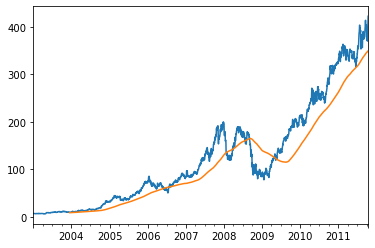

In [25]:
%matplotlib inline
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

rolling() is similar to groupby, it creates an object that enables rolling over a 250-day sliding window.

It can also account for missing data;

In [26]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

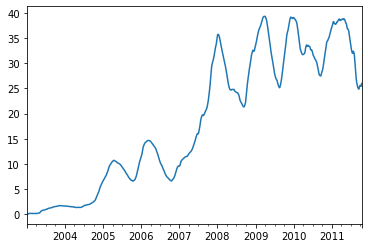

In [27]:
appl_std250.plot()

In order to compute an expanding window mean we use the 'expanding' operator.

<AxesSubplot:>

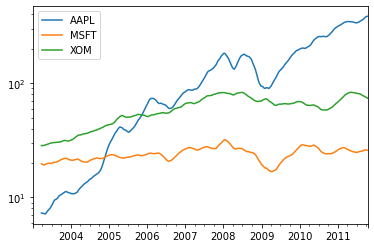

In [29]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

We can compute a 20-day rolling mean like this;

In [30]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially weighted functions

An alternative to using a static window size with equally weighted observations is to specify a constant decay factor to give more weight to more recent observations. We can use 'span' for this;

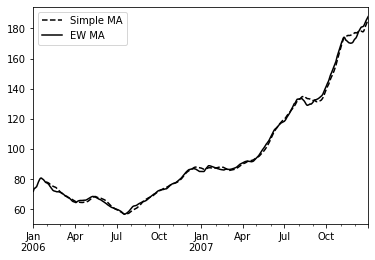

In [32]:
appl_px = close_px.AAPL['2006':'2007']
ma60 = appl_px.rolling(30, min_periods=20).mean()
ewma60 = appl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
import matplotlib.pyplot as plt
plt.legend()

### Binary moving window functions

Sometimes we may need to operate on two time series.

In [33]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

The 'corr' computes the rolling correlation with spx_rets;

<AxesSubplot:>

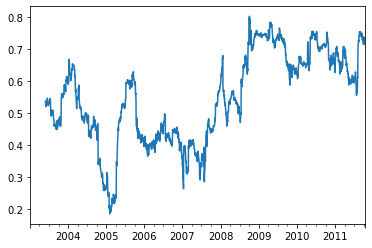

In [34]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

Suppose we want to compute the correlation of the S&P 500 index with many stocks at once;

<AxesSubplot:>

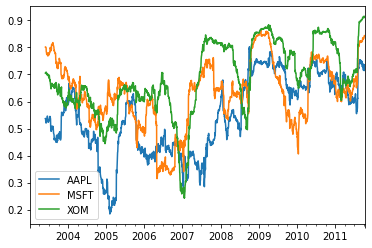

In [35]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-defind moving window functions

<AxesSubplot:>

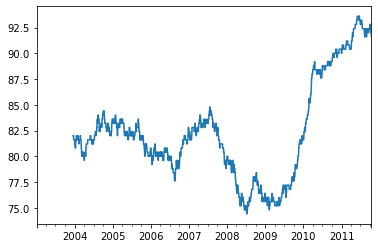

In [37]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()